In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np


In [60]:
train_directory = '/content/sample_data/train'
validation_directory = '/content/sample_data/test'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_directory, target_size=(150, 150), batch_size=20, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_directory, target_size=(150, 150), batch_size=20, class_mode='categorical')


Found 486 images belonging to 5 classes.
Found 63 images belonging to 5 classes.


In [72]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [73]:
history = model.fit(train_generator, steps_per_epoch=5, epochs=3, validation_data=validation_generator, validation_steps=5)

Epoch 1/3
5/5 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.2700

5/5 [==============================] - 11s 2s/step - loss: 0.6858 - accuracy: 0.2700 - val_loss: 0.5346 - val_accuracy: 0.2540
Epoch 2/3
5/5 [==============================] - 7s 1s/step - loss: 0.5159 - accuracy: 0.2200
Epoch 3/3
5/5 [==============================] - 8s 1s/step - loss: 0.4743 - accuracy: 0.3000


{'loss': [0.685837984085083, 0.5159283876419067, 0.4743359386920929], 'accuracy': [0.27000001072883606, 0.2199999988079071, 0.30000001192092896], 'val_loss': [0.5345960259437561], 'val_accuracy': [0.2539682686328888]}


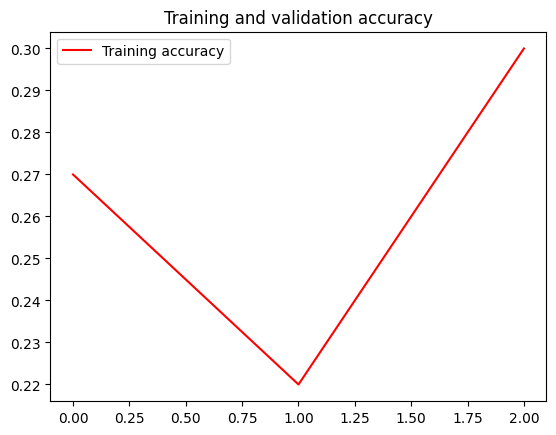

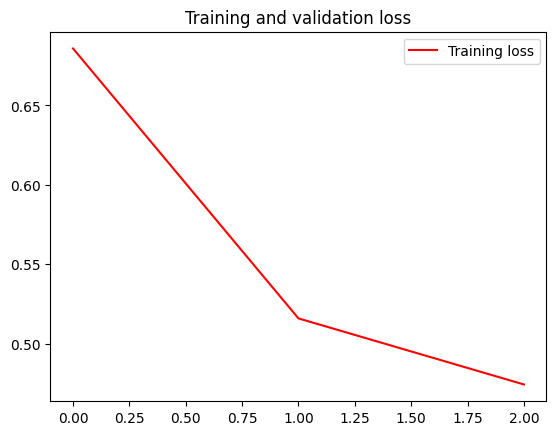

In [74]:
print(history.history)
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [75]:
image_local = '/content/sample_data/test/class_2/IMG-0001-00001_jumbo_jpeg.rf.4af5e7c047bac2007869a5e19663eb77.jpg'

In [76]:
img = image.load_img(image_local, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [77]:
prediction = model.predict(img_array)
print(prediction)
# predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 120ms/step
[[0.0379391  0.29124036 0.23019898 0.30379266 0.13682888]]
